# Test edge_detector

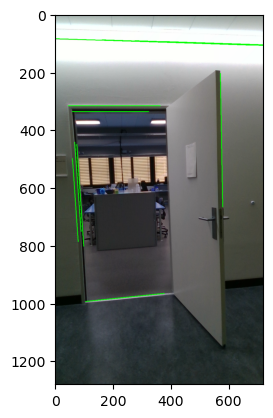

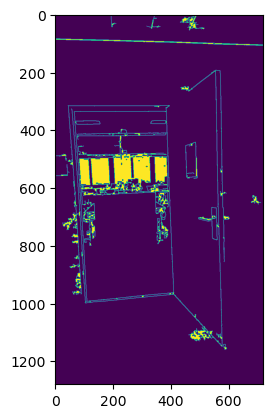

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image and convert it to grayscale
image = cv2.imread('door1_Color.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use the Canny edge detector to find edges in the image
edges = cv2.Canny(gray, 5, 250)

# Use morphological operations to clean up the edge map
kernel = np.ones((3,3), np.uint8)
edges = cv2.dilate(edges, kernel, iterations=1)
edges = cv2.erode(edges, kernel, iterations=1)

# Use Hough lines to detect lines in the edge map
#cv.HoughLinesP(image, rho, theta, threshold[, lines[, minLineLength[, maxLineGap]]]) -> lines
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=250, maxLineGap=10)

# Draw the detected lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(image)
plt.show()

plt.imshow(edges)
plt.show()

#cv2.imwrite("output.jpg", edges)


# V1 horizontale und vertikale Kanten

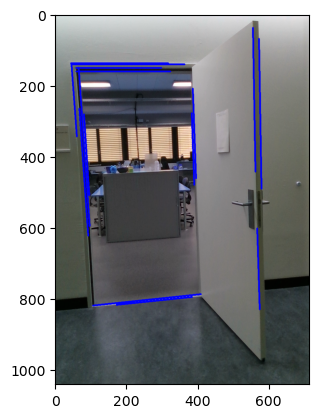

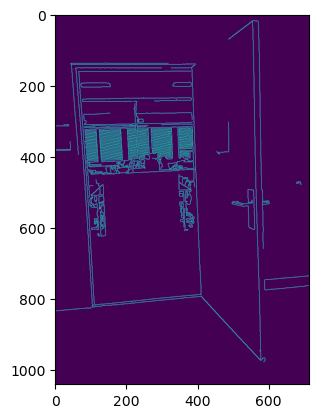

In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image and convert it to grayscale
image = cv2.imread('door2_Color.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and improve detection
gray = cv2.GaussianBlur(gray, (3, 3), 0)

# Use the Canny edge detector to find edges in the image
edges = cv2.Canny(gray, 50, 200)

# Detect lines using Hough line detection
#cv.HoughLinesP(image, rho, theta, threshold[, lines[, minLineLength[, maxLineGap]]]) -> lines
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=200, maxLineGap=10)


# Loop over the lines and draw them on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 3)

#cv2.imwrite("output.jpg", edges)

plt.imshow(image)
plt.show()

plt.imshow(edges)
plt.show()

# cv2.startWindowThread()
# cv2.namedWindow("preview", cv2.WINDOW_AUTOSIZE)
# cv2.imshow("preview", edges)
# key = cv2.waitKey(0)
# cv2.destroyAllWindows()

# V2 horizontal und vertikal

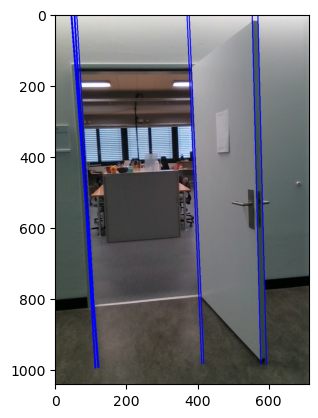

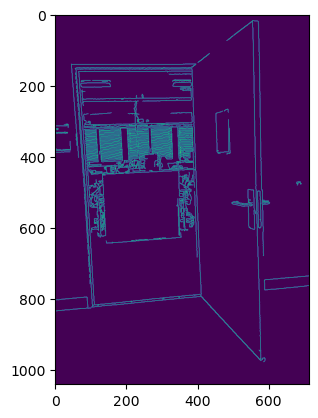

In [3]:
# Import the necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image and convert it to grayscale
image = cv2.imread('door2_Color.png')
image = image[...,::-1].copy()


# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use the Canny edge detector to find edges in the image
edges = cv2.Canny(gray, 50, 150, apertureSize = 3)

# Use the Hough transform to detect lines in the image
line_vert = cv2.HoughLines(edges, 1, np.pi/180, 200,min_theta=2)
line_hor = cv2.HoughLines(edges, 1, np.pi/180, 200,max_theta=1)

# Loop through the lines and draw them on the image
for line in line_vert:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

cv2.COLORMAP_DEEPGREEN
for line in line_vert:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    
    cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)


plt.imshow(image)
plt.show()

plt.imshow(edges)
plt.show()


# Test A1

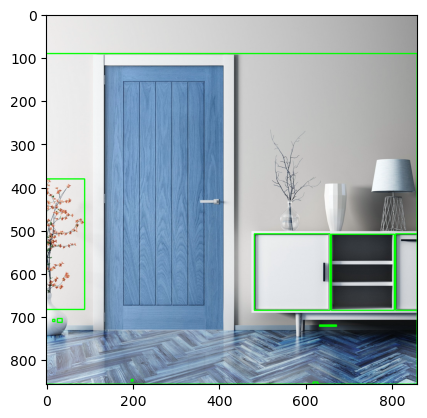

In [3]:
import cv2
import matplotlib.pyplot as plt

# Load the input image
img = cv2.imread("door.png")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply edge detection to the grayscale image
edges = cv2.Canny(gray, 50, 100)

# Define the kernel for dilation
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

# Dilate the edges
dilated = cv2.dilate(edges, kernel)

# Find contours in the dilated image
contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate over the contours and draw a rectangle around each one
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)

# Save the output image
#cv2.imwrite("output.jpg", img)

plt.imshow(img)
plt.show()


# Test A2

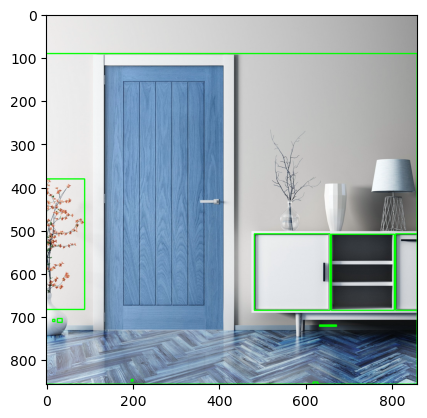

In [5]:
#«write python code who detects a door in a picture and calculate the the size of the door»
#«create additionally a output picture where the door is red framed»

import cv2
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('door.png')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect edges in the image using Canny edge detection
edges = cv2.Canny(gray, 50, 100)

# Find contours in the edge map
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate over the contours
for contour in contours:
    # Check if the contour is a rectangle
    if cv2.isContourConvex(contour) and len(contour) == 4:
        # Calculate the bounding box of the contour
        x, y, w, h = cv2.boundingRect(contour)

        # Check if the aspect ratio of the bounding box is close to 1:2 (typical aspect ratio of a door)
        if abs(w / h - 1 / 2) < 0.1:
            # Calculate the size of the door
            size = (w + h) / 2
            print('Door size:', size)

            # Draw a red rectangle around the door in the output image
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

# Save the output image
#cv2.imwrite('output.jpg', image)
plt.imshow(img)
plt.show()
